In [49]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 600)

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB


In [50]:
df = pd.read_csv('TRAIN.csv')
test = pd.read_csv('TEST.csv')

In [51]:
df.head()

,id,text,category
0,3973,1047 6700 4178 2912 183 6700,0
1,4462,4035 4563 1994 154 5373 4956 6035 4393 4017 40...,1
2,2889,5035 7685 3139 4407 254 584 6589 8518 3078,0
3,3457,1047 2540 2578 6700 2242 230 3771 4676 5881 64...,0
4,1555,7685 5868 237 6794 3078,0


In [52]:
test.head()

,id,text
0,1546,5222 7526 427 4829 7526 1164 4768 997 7924 332...
1,2956,590 983 5773 8352 1803 237 5045 6300 6267 5773...
2,4248,5915 4871 2982 6310 2734 3581 5773 6498 5773
3,4403,5435 1994 7248 1944 4017 3567 8618 5018 6619 3...
4,2097,6666 230 4768 2684 5773 3656 907 5922 2295 577...


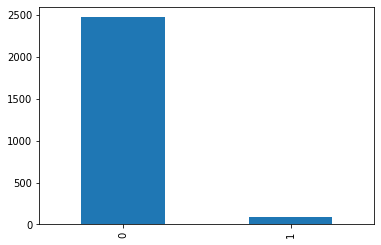

In [53]:
df.category.value_counts().plot.bar()

In [54]:
df.category.value_counts()

0    2472
1      86
Name: category, dtype: int64

In [55]:
dff = df.drop(['id','category'],1)

for cols in dff:
    dff[cols] = dff[cols].astype('str')

In [56]:
test_dff = test.drop('id',1)

for col in test_dff:
    test_dff[col] = test_dff[col].astype('str')

In [57]:
X = dff.text
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=8)

In [58]:
count_vec = CountVectorizer(max_features=4000,lowercase=False, ngram_range=(1,2),max_df=0.9,min_df=0)

In [59]:
x_train_features = count_vec.fit_transform(X_train).todense()
x_test_features = count_vec.transform(X_test).todense()


In [60]:
x_test_prediction = count_vec.transform(test_dff.text).todense()

In [61]:
x_train_features.shape

(2046, 4000)

In [62]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_train_ovr, y_train_ovr = ros.fit_sample(x_train_features, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [63]:
divsion = pd.DataFrame({'category':y_train_ovr})
divsion.category.value_counts()

1    1975
0    1975
Name: category, dtype: int64

In [64]:
from sklearn.feature_selection import RFE
nb_clf = MultinomialNB()

# selector = RFE(nb_clf,200)
# X_train_rfe = selector.fit_transform(X_train_ovr, y_train_ovr)
# X_test_rfe=selector.transform(x_test_features)

nb_clf.fit(X_train_ovr, y_train_ovr)
y_pred = nb_clf.predict(x_test_features)
print(accuracy_score(y_test,y_pred)*100)

98.6328125


In [65]:
from sklearn.metrics import precision_score

print(precision_score(y_test,y_pred, average='macro'))


0.8590868196131354


In [66]:
lr = LogisticRegression(random_state=2)

# selector = RFE(lr,158)
# X_train_rfe = selector.fit_transform(X_train_ovr, y_train_ovr)
# X_test_rfe=selector.transform(x_test_features)


lr.fit(X_train_ovr, y_train_ovr)

y_pred_lr = lr.predict(x_test_features)
print(classification_report(y_test,y_pred_lr))

print("precision score is", precision_score(y_test,y_pred_lr,average='macro'))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       497
           1       0.86      0.80      0.83        15

    accuracy                           0.99       512
   macro avg       0.93      0.90      0.91       512
weighted avg       0.99      0.99      0.99       512

precision score is 0.9255593803786575


In [67]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=3)

# selector = RFE(rf_clf,158)
# X_train_rf = selector.fit_transform(X_train_ovr, y_train_ovr)
# X_test_rf=selector.transform(x_test_features)

rf_clf.fit(X_train_ovr, y_train_ovr)
predicted_rf = rf_clf.predict(x_test_features)
print("SVC classification chart:\n",classification_report(y_test, predicted_rf))
print("precision score is", precision_score(y_test, predicted_rf,average='macro'))

SVC classification chart:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       497
           1       1.00      0.53      0.70        15

    accuracy                           0.99       512
   macro avg       0.99      0.77      0.84       512
weighted avg       0.99      0.99      0.98       512

precision score is 0.9930555555555556


In [68]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gb=GradientBoostingClassifier(random_state=2)

# selector = RFE(clf_gb,158)
# X_train_gb = selector.fit_transform(X_train_ovr, y_train_ovr)
# X_test_gb=selector.transform(x_test_features)

clf_gb.fit(X_train_ovr, y_train_ovr)

predicted_xgb = clf_gb.predict(x_test_features)
print("SVC classification chart:\n",classification_report(y_test, predicted_xgb))
print("precision score is", precision_score(y_test, predicted_xgb,average='macro'))


SVC classification chart:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       497
           1       0.79      0.73      0.76        15

    accuracy                           0.99       512
   macro avg       0.89      0.86      0.88       512
weighted avg       0.99      0.99      0.99       512

precision score is 0.8888410786001147


In [69]:
#testt_dff = test_dff.drop('id',1)

In [70]:
#test_dff = test_dff.iloc[:,0:103]

In [71]:
final_1 = nb_clf.predict(x_test_prediction)
output = pd.DataFrame(data = final_1, columns=['category'])
output.to_csv('string_word_1.csv', index=False)
output

,category
0,0
1,0
2,0
3,1
4,0
...,...
861,0
862,0
863,0
864,0
